In [2]:
from wind_ae.wrapper.relax_wrapper import wind_simulation as wind_sim
from wind_ae.wrapper.wrapper_utils import constants as const
from wind_ae.wrapper.wrapper_utils.plots import energy_plot

import matplotlib.pyplot as plt
from wind_ae.wrapper.wrapper_utils.plots import _custom_rc_params
import matplotlib.ticker as ticker
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
def plotter(soln, Mdot_legend=True, line_color='k',color='#0072BD', line_style='-', line_label='',label_dim=[0,1.35,2],
             ion_label=True,first_plotted=False, ax=0): 
    '''
    Description: 
        Plots density (g/cm3), temperature (K), velocity (10 km/s), 
        ionization fraction as a function of r (Rp).
        
    Arguments:
        soln - windsoln object (sim.windsoln)
        Mdot_legend - Bool; if True, put Mdot in legend of plot. Else, just prints.
        line_color - str; line color 
        line_style - str; line style
        label_dim - list; default=[0,1.3,2]. Location of label and ncols [x,y,ncols]. 
        first_plotted - Bool; True if this the first of many Four plots 
                        to be plotted on the same axes. 
    Returns:
        ax - axes object (if first_plotted=True)
        title
    '''
    try: # Check if r_cori has be calculated. If not, calculate all post-facto user variables
        soln.r_cori
    except AttributeError:
        if soln.integrate_outward == 0:
            soln.r_cori = 1e10
        else:
            soln.add_user_vars()
    
    radius_norm = 1.0
    ll=2
    alpha=0.5
    radius = soln.soln_norm['r']
    R_H = soln.semimajor*(soln.Mp/(3*soln.Mstar))**(1/3) / soln.Rp
    nspecies = soln.nspecies
    
    colormap,custom_cycler,fontsize,columns = _custom_rc_params(line_color,nspecies)

    stack=2
    if first_plotted==True:
        fig, ax = plt.subplots(stack,2,sharex=True,figsize=[11,6])
        fig.subplots_adjust(hspace=0)
        ax[1,0].axvline(radius_norm*(soln.soln_norm['z'][1]+1.),
                        c=color, alpha=alpha, ls='--', zorder=3,label='Sonic Point')
        ax[1,0].axvline(R_H,ls=':',c=color,label='Hill Radius')
#         if soln.Rmax > soln.r_cori:
#             ax[1,0].fill_betweenx((0,np.max(soln.soln['rho'])),
#                                   soln.r_cori,soln.Rmax,alpha=0.3,color=line_color,
#                                   label=r'R$_{cori}$ = %.2fR$_p$' %soln.r_cori)
#         ax[1,0].legend()
        ax[1,0].legend(loc='upper right', 
                       bbox_to_anchor=(1,2),ncol=1)  
    #Density (+Hill Radius and sonic point for legend purposes)
    ax[0,0].semilogy(soln.soln_norm['r'], soln.soln['rho'],c=color,lw=ll,ls=line_style,
                     label=line_label)
#     ax[0,0].legend(loc='upper left', 
#                    bbox_to_anchor=(label_dim[0],label_dim[1]),ncol=label_dim[2],frameon=False)    
    ax[0,0].set_ylabel(r'Density (g/cm$^3$)')
 
    #Velocity 
    ax[1,0].plot(soln.soln_norm['r'], soln.soln['v']/1e6,c=color,lw=ll,ls=line_style)
    ax[1,0].set_ylabel(r'Velocity (10 km/s)')
    
    #Temperature
    mdot = (soln.Mdot)#/const.Msun)*3.154e+7 #in Msun/year
    print(f'*****{line_label:s} Mdot = {mdot:.2e} g/s ******')
    ax[0,1].plot(soln.soln_norm['r'], soln.soln['T']/1000,c=color,
                     ls=line_style,lw=ll,label=r'%s: %.1e g/s' %(line_label,mdot))
    ax[0,1].set_ylim(np.min(soln.soln['T']/1000)*0.97,np.max(soln.soln['T']/1000)*1.03)
    ax[0,1].set_ylabel(r'Temperature (1000 K)')
    ax[0,1].set_yscale('log')
    ax[0,1].get_yaxis().set_major_formatter(ticker.ScalarFormatter())
#     ax[0,1].get_yaxis().set_minor_formatter(ticker.ScalarFormatter())
    if Mdot_legend==True:
        leg = ax[0,1].legend(edgecolor='k')
        leg.get_frame().set_linewidth(1.5)    #Ionization fraction
    title = ''
    ax[1,1].set_prop_cycle(custom_cycler)
    for j,spname in enumerate(soln.species_list):
        spname = spname.replace(' ','')
        if first_plotted == True:
            ax[1,1].semilogy(soln.soln_norm['r'],
                             1-soln.soln['Ys_'+spname],label=spname,c=color)
        else:
            ax[1,1].semilogy(soln.soln_norm['r'],
                             1-soln.soln['Ys_'+spname],c=color)
 
        title += spname+': %.2f, '%(soln.HX[j])
    ax[1,1].set_ylabel(r'Ionization Fraction')
    ax[1,1].set_ylim((1e-2,0.99999999))
#     ax[1,1].set_yticks([1e-3,1e-2,1e-1],labels=[r'$10^{\text{-}3}$',r'$10^{-2}$',r'$10^{-1}$'])
    if ion_label==True:
        ax[1,1].legend(fontsize=fontsize,ncol=columns,loc='upper right')

    for k in range(2):
        ax[1,k].set_xlabel(r'Radius (R$_p$)')
        for m in range(stack):
            ax[m,k].axvline(radius_norm*(soln.soln_norm['z'][1]+1.),
                             c=color, alpha=alpha, ls='--', zorder=3)
            ax[m,k].axvline(R_H,ls=':',c=color)
#             ax[m,k].set_xscale('log')
    plt.gca().set_xlim(left=soln.Rmin)
    if first_plotted==True:
        return ax

         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.
         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.


/var/folders/1b/b30tn34j4p104kcg6lt_mnf00000gn/T/ipykernel_15192/2354029294.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  minrad = float(radius[soln.soln['T'] == np.min(soln.soln['T'])])


*****Hot Jupiter Mdot = 1.64e+10 g/s ******
4.57e+06


/var/folders/1b/b30tn34j4p104kcg6lt_mnf00000gn/T/ipykernel_15192/2354029294.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  minrad = float(radius[soln.soln['T'] == np.min(soln.soln['T'])])


*****Neptune Mdot = 8.73e+09 g/s ******
2.35e+06


/var/folders/1b/b30tn34j4p104kcg6lt_mnf00000gn/T/ipykernel_15192/2354029294.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  minrad = float(radius[soln.soln['T'] == np.min(soln.soln['T'])])


*****Mini-Neptune Mdot = 1.08e+10 g/s ******
1.77e+06


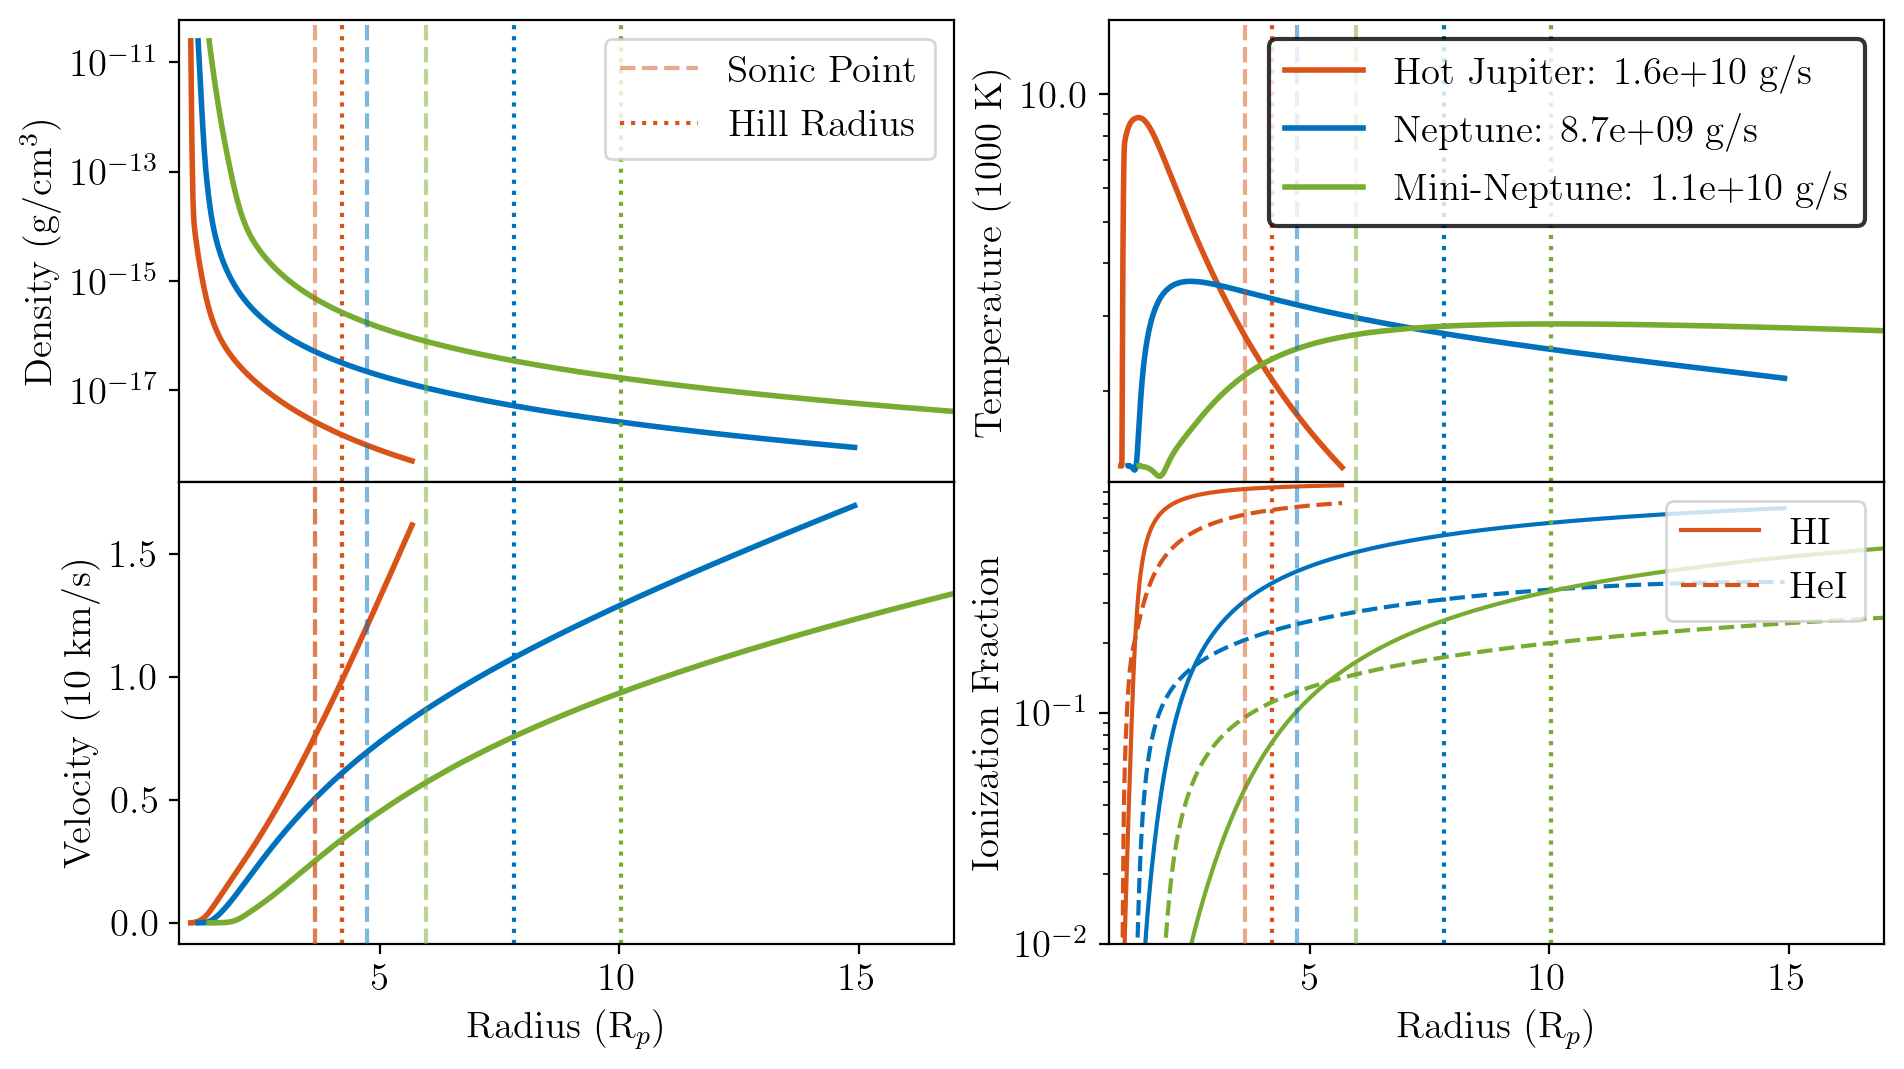

In [6]:
sim = wind_sim()
sim.load_uservars('data/small_HJ.csv')
# print(sim.windsoln.semimajor/const.au)
ax = plotter(sim.windsoln,first_plotted=True,
              line_label='Hot Jupiter',
              line_color='tab:orange',color='#D95319')
print("%.2e"%(np.sqrt(2*const.G*sim.windsoln.Mp/sim.windsoln.Rp)))
sim.load_uservars('data/neptune.csv')
# print(sim.windsoln.semimajor/const.au)
plotter(sim.windsoln,ax=ax,line_label='Neptune',
        line_color='tab:blue',color='#0072BD')
print("%.2e"%(np.sqrt(2*const.G*sim.windsoln.Mp/sim.windsoln.Rp)))
sim.load_uservars('data/superearth.csv')
# print(sim.windsoln.semimajor/const.au)
plotter(sim.windsoln,ax=ax,line_label='Mini-Neptune',
        line_color='tab:green',color='#77AC30')
print("%.2e"%(np.sqrt(2*const.G*sim.windsoln.Mp/sim.windsoln.Rp)))
ax[0,1].set_ylim(top=15)
# ax[0,1].legend()

plt.xlim(0.8,17)

# plt.savefig('../Figures/Final/three_planet.pdf',dpi=500,
#             facecolor='white',bbox_inches='tight')
plt.show()